# Regresión Logistica con Dataset Heart_ds (918 datos)

#1. Importar Librerias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
import math as mt

#2. Cargar Datasets

Dataset tomado de Kaggle: https://www.kaggle.com/datasets/mexwell/heart-disease-dataset/data

In [ ]:
Heart_ds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/heart_Project.csv')

In [ ]:
# Visualizar DataFrame Heart_ds
Heart_ds.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


#3. Variables del Dataset

| Variable | Descripción | Tipo de Dato |
|---|---|---|
| Age | Edad del paciente en años. | Numérico |
| Sex | Sexo del paciente (M: Masculino, F: Femenino). | Categórico |
| ChestPainType | Tipo de dolor torácico (ATA, NAP, ASY, TA). | Categórico |
| RestingBP | Presión arterial en reposo (mm Hg). | Numérico |
| Cholesterol | Nivel de colesterol sérico (mg/dL). | Numérico |
| FastingBS | Nivel de glucosa en ayunas (0: <120 mg/dL, 1: >=120 mg/dL). | Binario |
| RestingECG | Resultados del electrocardiograma en reposo (Normal, ST, LVH). | Categórico |
| MaxHR | Frecuencia cardíaca máxima alcanzada (lpm). | Numérico |
| ExerciseAngina | Angina inducida por ejercicio (Y: Sí, N: No). | Binario |
| Oldpeak | Depresión del segmento ST en reposo (indicador de isquemia). | Numérico |
| ST_Slope | Inclinación del segmento ST (Up, Flat, Down). | Categórico |
| HeartDisease | Presencia de enfermedad cardíaca (0: No, 1: Sí). | Binario |

#4. Análisis Exploratorio de Datos

In [ ]:
#visualizar la forma del DataFrame Heart_ds
print(Heart_ds.shape)

(918, 12)


In [ ]:
# Visualizar info del DataFrame Heart_ds
Heart_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# Visualizar datos en blanco del DataFrame Heart_ds
datos_blanco = pd.DataFrame({
'Registros en Blanco' : Heart_ds.isna().sum(),
'% Registros en Blanco' : Heart_ds.isna().sum()/len(Heart_ds)
})
datos_blanco

,Registros en Blanco,% Registros en Blanco
Age,0,0.0
Sex,0,0.0
ChestPainType,0,0.0
RestingBP,0,0.0
Cholesterol,0,0.0
FastingBS,0,0.0
RestingECG,0,0.0
MaxHR,0,0.0
ExerciseAngina,0,0.0
Oldpeak,0,0.0


In [ ]:
# Visualizar las descripcion estadistica del DataFrame Heart_ds
print(Heart_ds.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [ ]:
#Visualizar Distribución de las categorias del DataFrame Heart_ds
print(Heart_ds.groupby("HeartDisease").size())

HeartDisease
0    410
1    508
dtype: int64


**Comentarios:**



*  El conjunto de datos Heart_ds contiene 918 registros y 12 columnas.
*   No hay datos faltantes en el conjunto de datos.

*   Las variables numéricas tienen diferentes rangos y distribuciones.
*   Las categorias binarias de la variable HeartDisease estan balanceadas

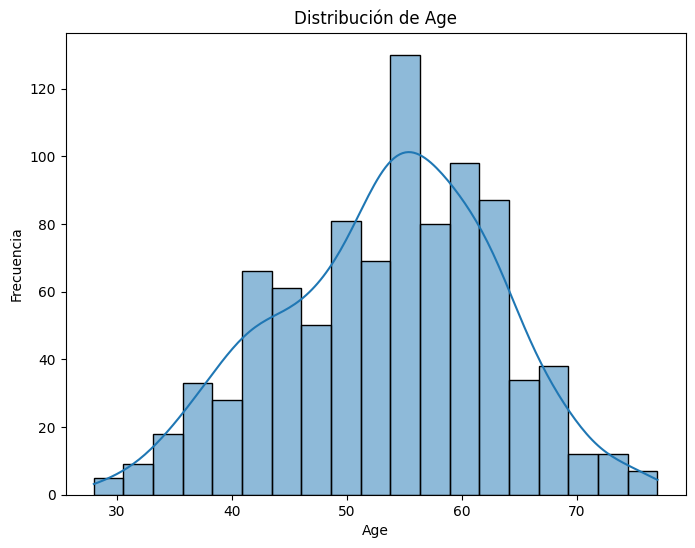

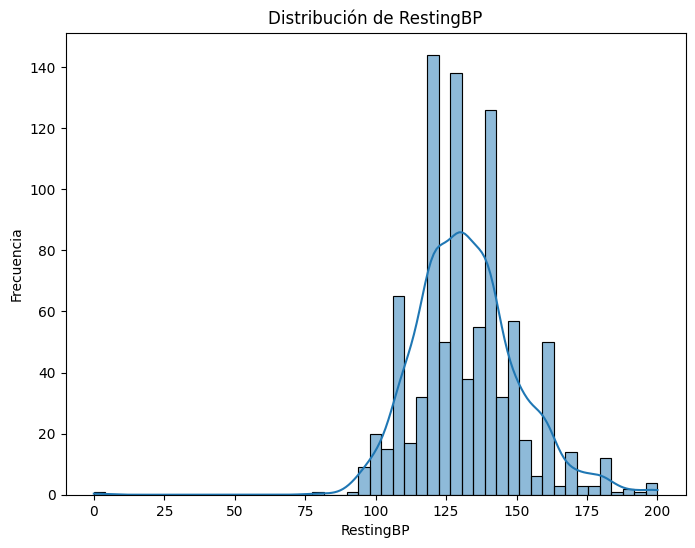

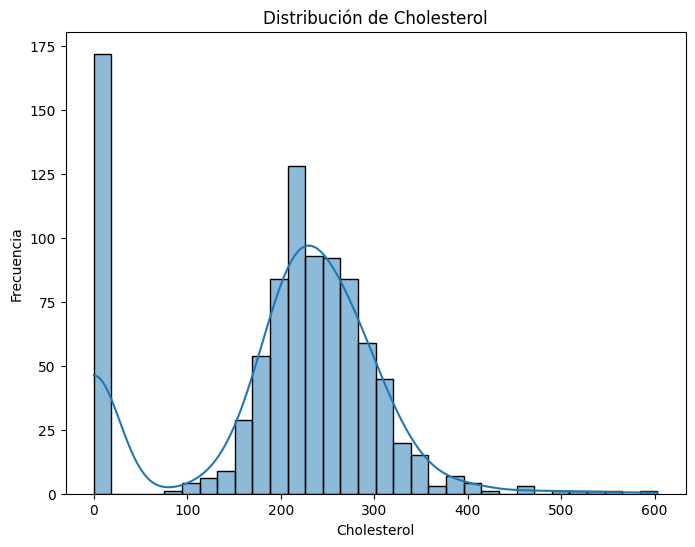

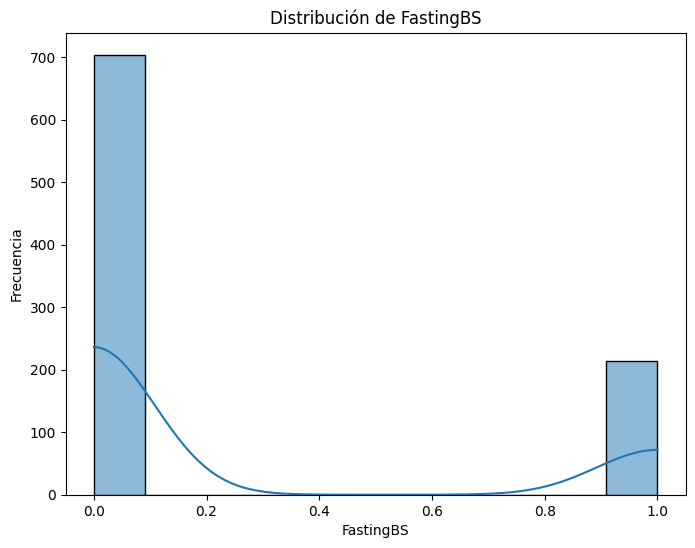

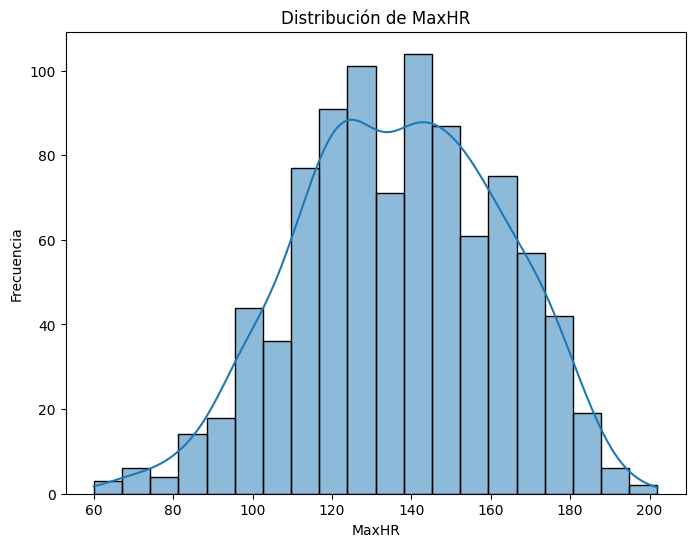

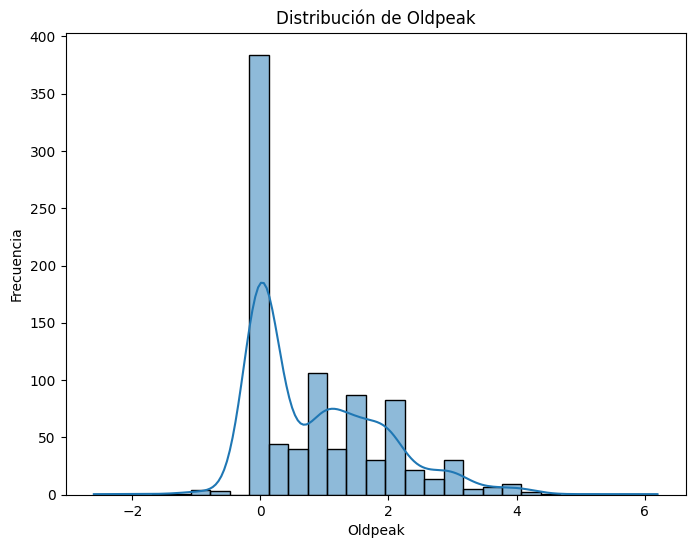

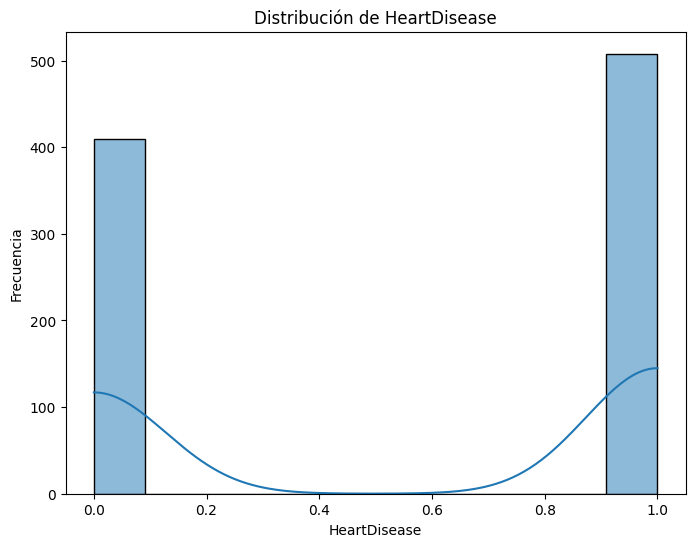

In [ ]:
# Visualizar la distibucion de los datos de las variables numericas del DataFrame Heart_ds

numerical_features = Heart_ds.select_dtypes(include=['number']).columns

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(Heart_ds[feature], kde=True)
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.show()

<Figure size 1900x1200 with 0 Axes>

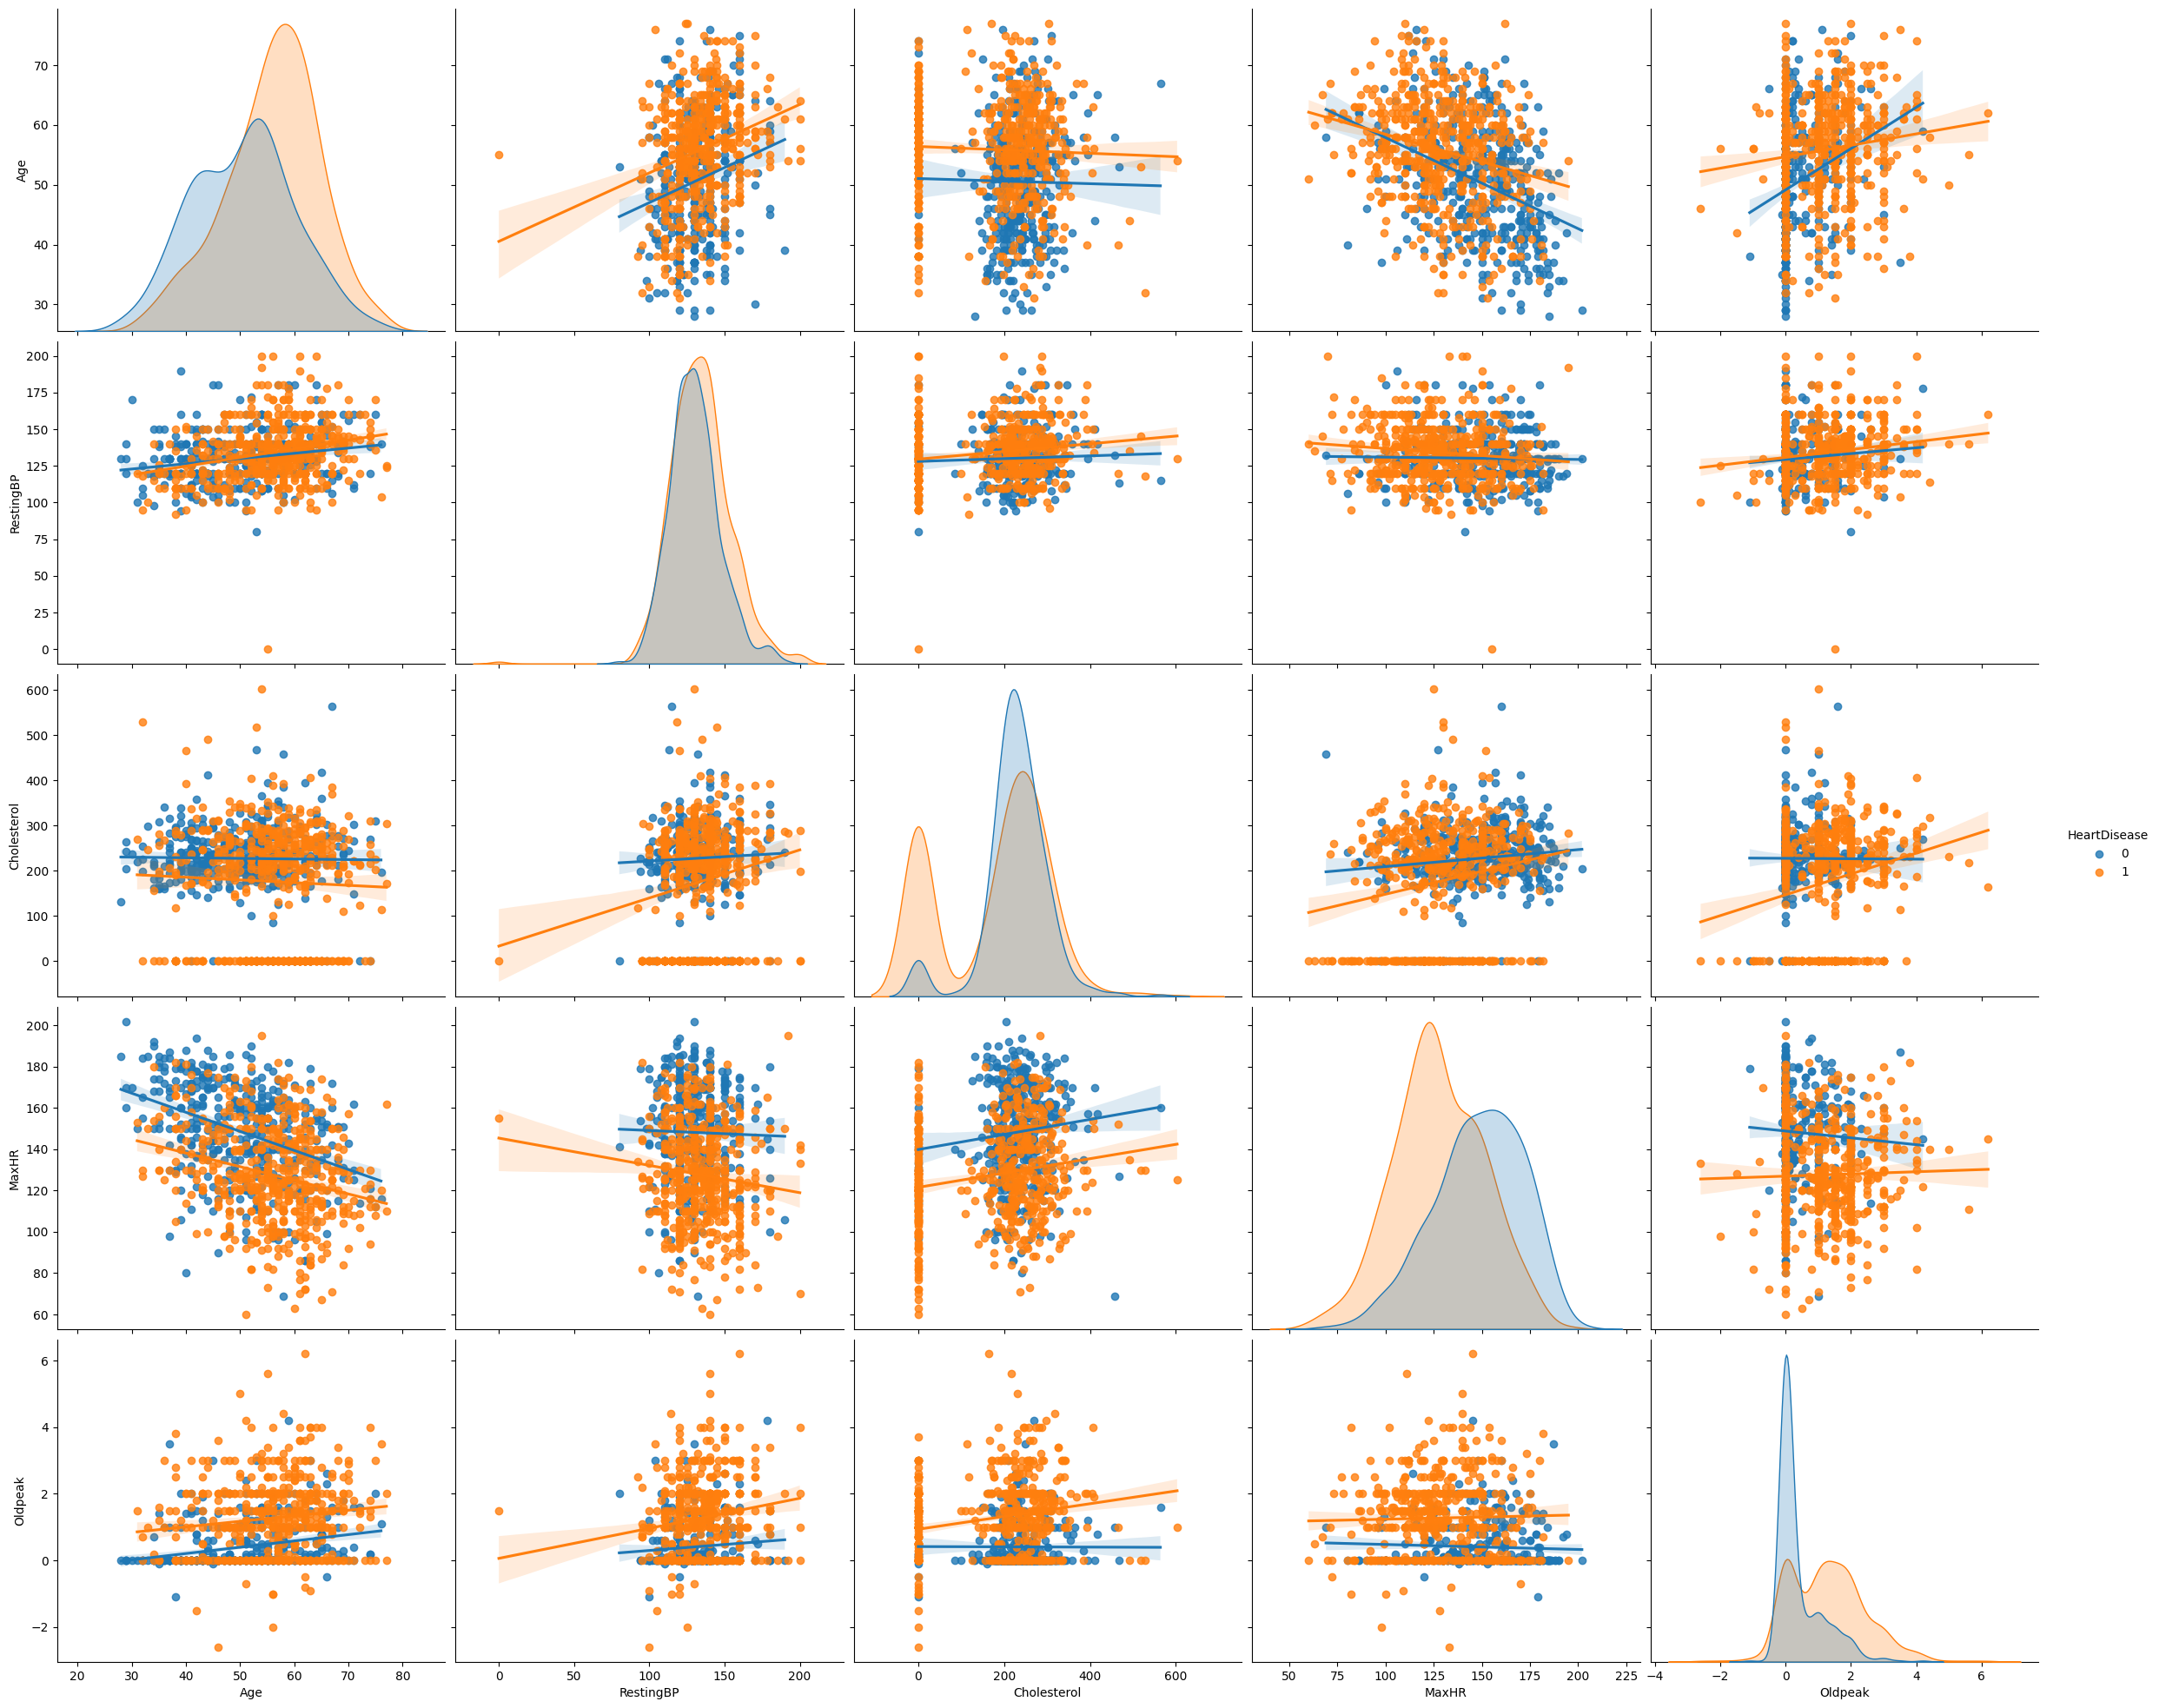

In [ ]:
#Visualizar Grafico de Dispersión de los datos del DataFrame Heart_ds

plt.figure(figsize=(19, 12))
sns.pairplot(Heart_ds.dropna(), hue="HeartDisease", height=4, aspect=1.2, vars=["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"], kind="reg")
plt.show()

El gráfico de dispersión sugiere que la edad, la presión arterial en reposo y la depresión del ST inducida por el ejercicio (Oldpeak) podrían estar relacionadas con la presencia de enfermedad cardíaca.

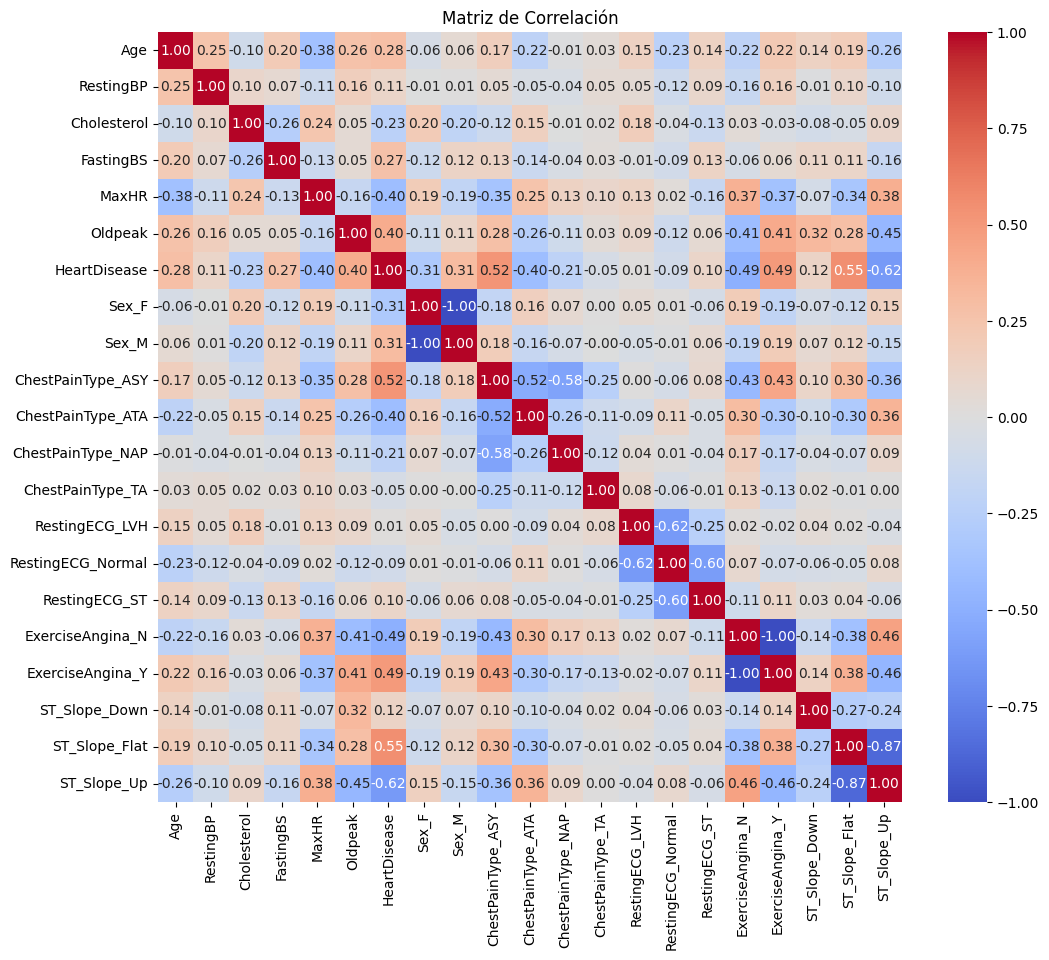

In [ ]:
# visualizar la matriz de correlación del DataFrame Heart_ds

# Obtener una lista de características categóricas (tipo de objeto)
categorical_features = Heart_ds.select_dtypes(include=['object']).columns

# Realizar codificación one-hot en características categóricas
Heart_ds_enc = pd.get_dummies(Heart_ds, columns=categorical_features)

# Calcula la matriz de correlación
corr_matrix = Heart_ds_enc.corr()

# Grafica la matriz de correlación usando un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Comentario

* La mayoría de las correlaciones son débiles o moderadas. No hay correlaciones extremadamente fuertes entre las variables.

* Las variables relacionadas con el estilo de vida, como fumar, la diabetes, la dificultad para caminar y el historial de derrames cerebrales, muestran correlaciones positivas débiles con la enfermedad cardíaca.

# 5. Definir datos de entrenamiento y prueba

In [ ]:
#DataFrame Heart_ds

X = Heart_ds_enc.drop('HeartDisease', axis=1)
y = Heart_ds_enc['HeartDisease']

In [ ]:
#Visualizar distribución de los datos de A y b

print(X.shape)
print(y.shape)

(918, 20)
(918,)


##5.1. División de los datos de entrenamiento

In [ ]:
#Dividir datos en conjunto de entrenamiento y prueba para el DataFrame Heart_ds

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

# validando los resultados
print("Tamaño de X_train=", X_train.shape)
print("Tamaño de X_test=", X_test.shape)
print("Tamaño de y_train=", y_train.shape)
print("Tamaño de y_test=", y_test.shape)

Tamaño de X_train= (688, 20)
Tamaño de X_test= (230, 20)
Tamaño de y_train= (688,)
Tamaño de y_test= (230,)


# 6. Modelo de Regressión Lógistica

## 6.1. Modelo sklear_model

### 6.1.1. Creación y entrenamiento del modelo

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Predecir datos con los set de entrenamiento y prueba para el DataFrame

y_test_pred = model.predict(X_test)
print(y_test_pred)

[0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1
 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1
 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1
 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0
 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1
 1 0 1 0 1 1 0 0]


### 6.1.2 Evaluar rendimiento

- Matriz de Confusión

<Axes: >

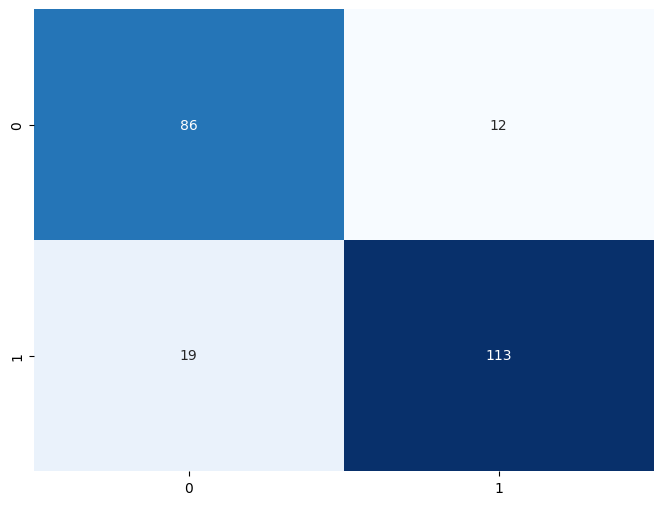

In [ ]:
# Calcular la matriz de confusión para X & y (Heart_ds)
cm = confusion_matrix(y_test, y_test_pred)

# Visualiza la matriz de confusión.
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)



In [ ]:
#Obtener el reporte de la rendimiento de la Matriz de Confusión
targer_names = ['0', '1']
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.82      0.88      0.85        98
           1       0.90      0.86      0.88       132

    accuracy                           0.87       230
   macro avg       0.86      0.87      0.86       230
weighted avg       0.87      0.87      0.87       230



- Curva ROC

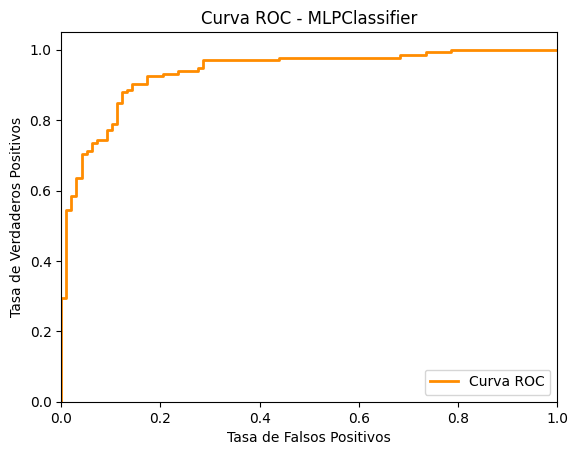

In [ ]:
#Curva de ROC para X & y (Heart_ds)

# Obtener las probabilidades de predicción para la clase positiva (1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - MLPClassifier')
plt.legend(loc="lower right")
plt.show()

Interpretación:

Este gráfico muestra que el modelo tiene un buen rendimiento, ya que la curva ROC se acerca bastante al eje Y lo cual indica alta tasa de verdaderos positivos, mientras mantiene baja la tasa de falsos positivos

* Histograma de errores

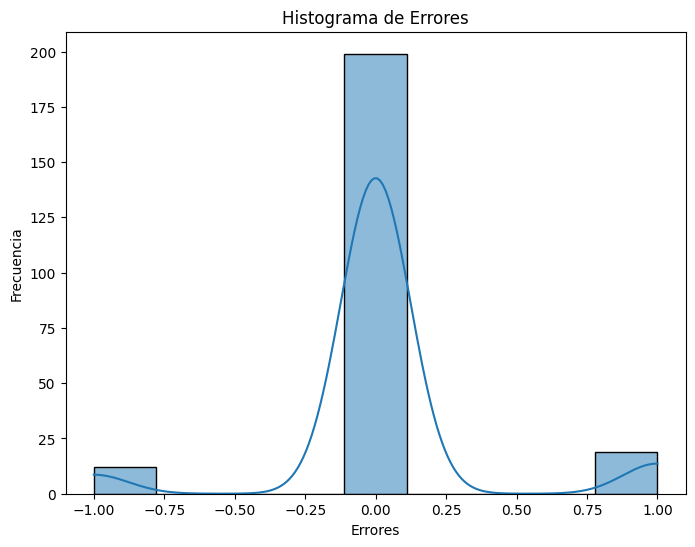

In [ ]:
# Calcular los errores (residuos) de X & y
errores = y_test - y_test_pred

# Crear el histograma
plt.figure(figsize=(8, 6))
sns.histplot(errores, kde=True)
plt.title('Histograma de Errores')
plt.xlabel('Errores')
plt.ylabel('Frecuencia')
plt.show()

Comentarios:

Concentración central en 0: La mayoría de los errores son pequeños, lo que indica buena precisión del modelo en general.
Extremos con algunos errores mayores: Sugiere la presencia de errores atípicos o en casos específicos, aunque son pocos en comparación con el volumen central.

Conclusión del ejercicio:

* Rendimiento del modelo: El modelo de Regresión Logística entrenado con Heart_ds muestra un buen rendimiento en general. Esto se refleja en las métricas de la matriz de confusión , la curva ROC y el histograma de errores. Con una precisión de 0.87 y un f1_ score de 0.85 para la categoria 0 y 0.88 para la categoria 1.

* Precisión: La precisión del modelo es alta 0.87, como lo indica la concentración central de errores cerca de 0 en el histograma.

# 8. Redes Neuronales

## Gemini prompt: Como puedo implementar una red neuronal con el modelo MLP Classifier

## 8.1. MLP Classifier

8.1.1 Creación y entrenamiento de la red neuronal con el modelo MLP

In [ ]:
#Crear una instancia del modelo MLPClassifier:

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)

In [ ]:
#Entrenar el modelo:

mlp_classifier.fit(X_train, y_train)

MLPClassifier(random_state=42)

In [ ]:
# Hacer las predicciones para X & y

y2_pred = mlp_classifier.predict(X_test)

8.1.2. Evaluar el rendimiento de la red neuronal

- Matriz de confusión

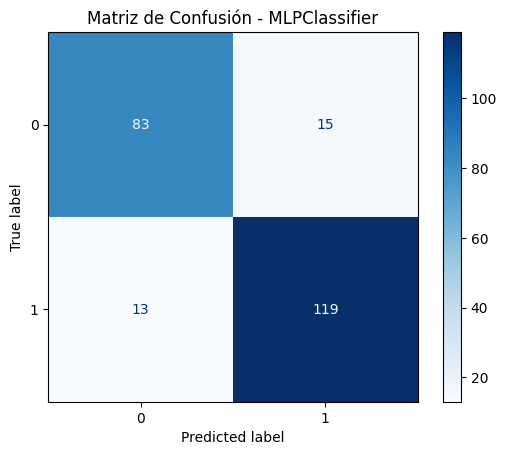

Precisión: 0.8782608695652174
              precision    recall  f1-score   support

           0       0.86      0.85      0.86        98
           1       0.89      0.90      0.89       132

    accuracy                           0.88       230
   macro avg       0.88      0.87      0.88       230
weighted avg       0.88      0.88      0.88       230



In [ ]:
# Calcula la matriz de confusión para y2_pred
cm = confusion_matrix(y_test, y2_pred)

# Crea una instancia de ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1']) # Asumiendo que tus etiquetas son '0' y '1'

# Grafica la matriz de confusión
disp.plot(cmap=plt.cm.Blues)  # Puedes cambiar el mapa de colores si lo deseas
plt.title('Matriz de Confusión - MLPClassifier')
plt.show()

accuracy = accuracy_score(y_test, y2_pred)
print("Precisión:", accuracy)

print(classification_report(y_test, y2_pred))


- Curva de ROC

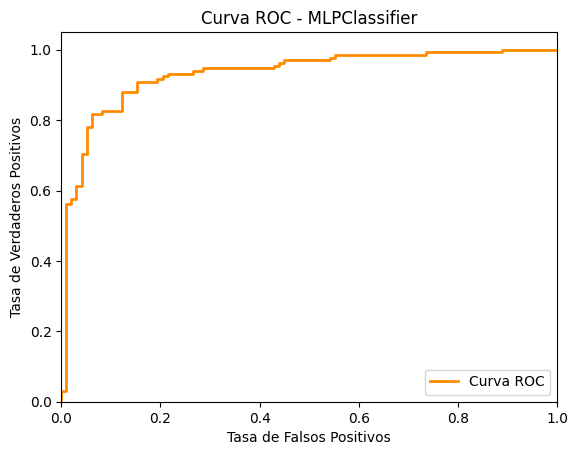

In [ ]:
# Curva de ROC para X & y

# Obtener las probabilidades de predicción para la clase positiva (1)
y2_pred_proba = mlp_classifier.predict_proba(X_test)[:, 1]

# Obtener las probabilidades de predicción para la clase positiva (1)
y2_pred_proba = mlp_classifier.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y2_pred_proba)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - MLPClassifier')
plt.legend(loc="lower right")
plt.show()

- Histograma de Error

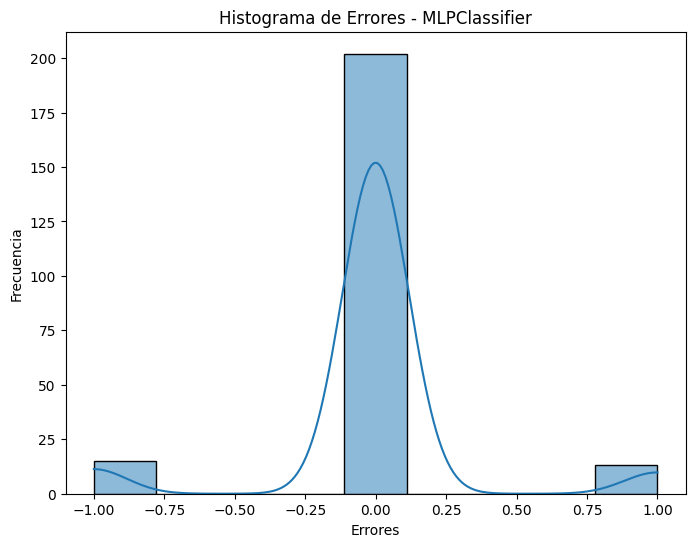

In [ ]:
# Calcular los errores (residuos) para X & y
errores = y_test - y2_pred

# Graficar el histograma de errores
plt.figure(figsize=(8, 6))
sns.histplot(errores, kde=True)
plt.title('Histograma de Errores - MLPClassifier')
plt.xlabel('Errores')
plt.ylabel('Frecuencia')
plt.show()

Comentarios:

El histograma muestra que la mayoría de las predicciones son correctas. Las barras a la izquierda (-1) indican falsos negativos (no detectar enfermedades), y las barras a la derecha (1) indican falsos positivos (diagnósticos erróneos). Un buen modelo debería tener pocos de ambos, centrando los errores cerca de 0.

Al comparar los modelos MLP Classifier y Regresión Logística, se obtienen los siguientes resultados:

* MLP Classifier muestra una precisión entre 0.85 y 0.87. La matriz de confusión indica un buen número de verdaderos positivos y negativos, aunque con algunos falsos positivos y negativos. La curva ROC refleja un buen rendimiento, pero no perfecto, y el histograma de errores muestra que la mayoría de los errores están cerca de 0, con algunos errores mayores en los extremos.

* Regresión Logística presenta una precisión similar, alrededor de 0.87. La matriz de confusión es comparable a la del MLP Classifier, con una distribución de verdaderos y falsos positivos/negativos similar. La curva ROC también es buena, acercándose al eje Y, y el histograma de errores muestra una distribución similar a la del MLP Classifier.

En términos de rendimiento, ambos modelos son bastante similares. La Regresión Logística tiene la ventaja de ser más fácil de interpretar, ya que los coeficientes permiten comprender la importancia de las variables predictoras. Por otro lado, el MLP Classifier es más complejo y requiere más tiempo de entrenamiento, pero tiene el potencial de mejorar con más datos y ajustes de hiperparámetros.

En conclusión, si la interpretabilidad es un factor clave, la Regresión Logística podría ser la mejor opción. Si se busca un modelo con más capacidad de ajuste y posibles mejoras con más datos, el MLP Classifier sería una opción a considerar.

## 8.2. Red Neuronal Manual (tf.keras.Sequential)

### 8.2.1. Crear y entrenar el modelo capa por capa

In [ ]:
# Crear el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_test.shape[1],)),
    tf.keras.layers.Dropout(0.2),  # Agregar dropout para regularización
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Agregar dropout para regularización
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilar el modelo

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

earlt_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Entrenar
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.5819 - loss: 4.1379 - val_accuracy: 0.7609 - val_loss: 0.9532
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6016 - loss: 1.9852 - val_accuracy: 0.7754 - val_loss: 0.6056
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6588 - loss: 1.1075 - val_accuracy: 0.5870 - val_loss: 0.8338
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6143 - loss: 1.1035 - val_accuracy: 0.6957 - val_loss: 0.6126
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5581 - loss: 1.1519 - val_accuracy: 0.4928 - val_loss: 1.1387
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.6500 - loss: 0.8707 - val_accuracy: 0.7246 - val_loss: 0.5285
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6496 - loss: 0.7757 - val_accuracy: 0.5072 - val_loss: 0.8017
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6519 - loss: 0.7986 - val_accuracy: 0.

### 8.2.2. Evaluación de la red neuronal

* Matriz de confusión

Pérdida: 0.3802242577075958
Precisión: 0.8695651888847351
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


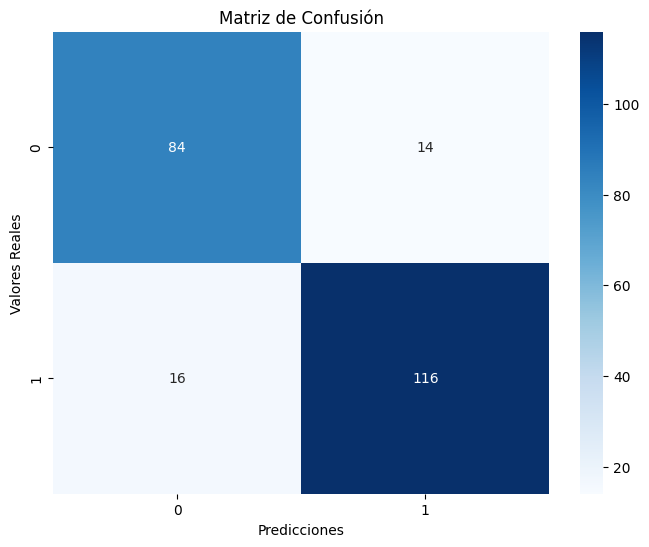

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        98
           1       0.89      0.88      0.89       132

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# Imprimir las métricas de desempeño
print("Pérdida:", loss)
print("Precisión:", accuracy)

# Obtener las predicciones del modelo
y_pred2 = model.predict(X_test)
y_pred_classes = np.argmax(y_pred2, axis=1)  # Convertir a clases (0 o 1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes)

# Crea el mapa de calor
plt.figure(figsize=(8, 6)) # Ajusta el tamaño de la figura si lo deseas
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

# Imprimir el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_classes))

* Curva de ROC

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


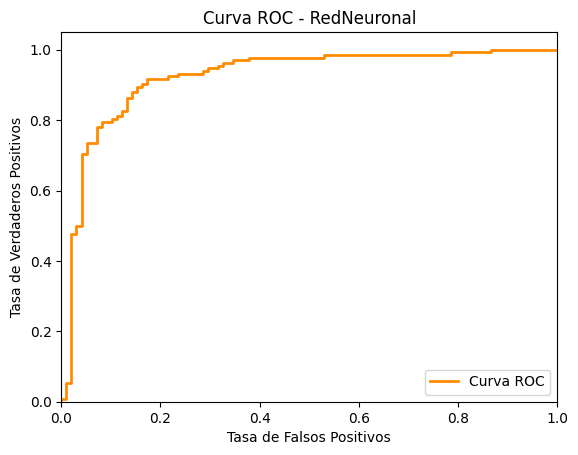

In [ ]:
# Obtener las probabilidades de predicción para la clase positiva (1)
y_pred2 = model.predict(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - RedNeuronal')
plt.legend(loc="lower right")
plt.show()

* Histograma de error

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


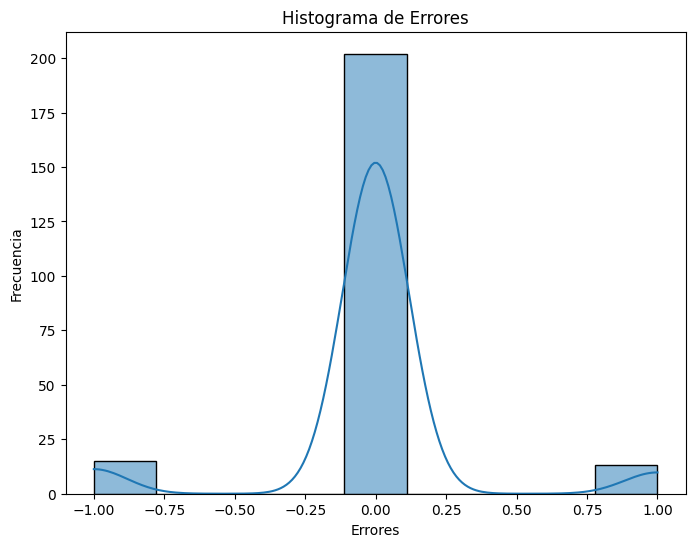

In [ ]:
# Obtener las predicciones de las clases (0 or 1)
y_pred_classes = np.argmax(model.predict(X_test), axis=1)

# Calculate errors (residuals)
errors = y_test - y_pred_classes

# Crear el histograma
plt.figure(figsize=(8, 6))
sns.histplot(errores, kde=True)
plt.title('Histograma de Errores')
plt.xlabel('Errores')
plt.ylabel('Frecuencia')
plt.show()

Comentario:

Tanto la red neuronal manual como el MLPClassifier lograron una precisión similar en la predicción de enfermedades cardíacas. La elección entre los dos depende del equilibrio deseado entre personalización, complejidad e interpretabilidad. La red neuronal manual permite una mayor flexibilidad, pero podría requerir un mayor ajuste. El MLPClassifier proporciona un enfoque conveniente y más simple con un buen rendimiento.